<a href="https://colab.research.google.com/github/gaddam12/Face-detection-system/blob/main/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Dataset**

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 83% 136M/163M [00:00<00:00, 234MB/s] 
100% 163M/163M [00:00<00:00, 227MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls


data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_954.jpg', 'with_mask_1815.jpg', 'with_mask_3658.jpg', 'with_mask_331.jpg', 'with_mask_2152.jpg']
['with_mask_3563.jpg', 'with_mask_2788.jpg', 'with_mask_1634.jpg', 'with_mask_2508.jpg', 'with_mask_3714.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1686.jpg', 'without_mask_421.jpg', 'without_mask_1697.jpg', 'without_mask_607.jpg', 'without_mask_2751.jpg']
['without_mask_1967.jpg', 'without_mask_1265.jpg', 'without_mask_742.jpg', 'without_mask_2380.jpg', 'without_mask_1708.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))


3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

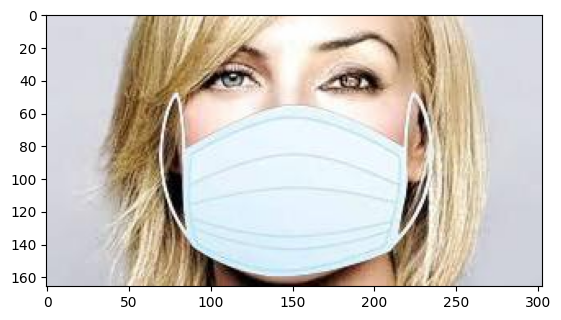

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1815.jpg')
imgplot = plt.imshow(img)
plt.show()

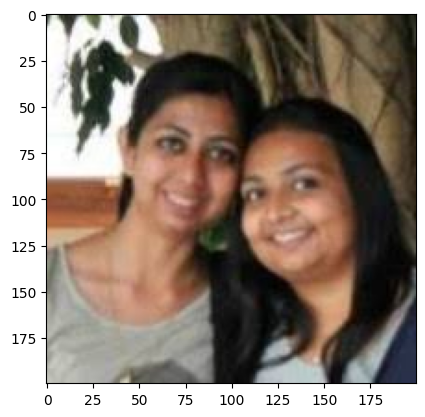

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1697.jpg')
imgplot = plt.imshow(img)
plt.show()


**Image Processing**

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [32]:

type(data)

list

In [33]:
len(data)

7553

array([[[236, 236, 236],
        [234, 234, 232],
        [239, 238, 235],
        ...,
        [239, 238, 236],
        [239, 238, 234],
        [239, 238, 234]],

       [[237, 236, 235],
        [238, 237, 235],
        [238, 237, 232],
        ...,
        [240, 239, 237],
        [238, 237, 232],
        [240, 239, 235]],

       [[238, 237, 235],
        [235, 234, 232],
        [235, 234, 231],
        ...,
        [237, 236, 234],
        [240, 239, 236],
        [239, 238, 234]],

       ...,

       [[208, 207, 216],
        [246, 245, 253],
        [242, 242, 247],
        ...,
        [249, 243, 247],
        [248, 242, 244],
        [247, 241, 244]],

       [[133, 133, 145],
        [225, 225, 235],
        [236, 236, 243],
        ...,
        [251, 244, 248],
        [250, 244, 246],
        [245, 239, 241]],

       [[ 66,  65,  79],
        [141, 141, 153],
        [243, 243, 254],
        ...,
        [249, 243, 245],
        [247, 241, 243],
        [248, 242, 244]]], dtype=uint8)
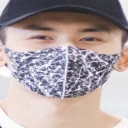

In [34]:
data[0]

In [35]:
type(data[0])


numpy.ndarray

In [36]:

data[0].shape

(128, 128, 3)

In [37]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)


In [38]:
type(X)

numpy.ndarray

In [39]:
type(Y)

numpy.ndarray

In [40]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [41]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [44]:

# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255


array([[[189, 192, 200],
        [129, 129, 146],
        [ 97,  96, 118],
        ...,
        [114, 101, 162],
        [127, 113, 173],
        [138, 124, 183]],

       [[161, 164, 175],
        [106, 106, 124],
        [ 88,  86, 109],
        ...,
        [ 99,  87, 147],
        [113, 101, 159],
        [134, 120, 179]],

       [[128, 130, 143],
        [ 87,  87, 106],
        [ 81,  79, 104],
        ...,
        [ 94,  85, 144],
        [107,  95, 154],
        [121, 108, 167]],

       ...,

       [[104, 119, 130],
        [120, 143, 158],
        [122, 152, 174],
        ...,
        [ 22,  36,   5],
        [ 41,  55,  21],
        [ 60,  74,  40]],

       [[113, 134, 147],
        [110, 136, 155],
        [110, 143, 167],
        ...,
        [ 39,  53,  22],
        [ 54,  69,  35],
        [ 68,  83,  48]],

       [[107, 136, 156],
        [102, 134, 157],
        [ 99, 136, 163],
        ...,
        [ 61,  75,  42],
        [ 74,  87,  53],
        [ 79,  92,  57]]], dtype=uint8)
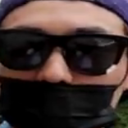

In [45]:

X_train[0]

In [46]:
X_train_scaled[0]

array([[[0.74117647, 0.75294118, 0.78431373],
        [0.50588235, 0.50588235, 0.57254902],
        [0.38039216, 0.37647059, 0.4627451 ],
        ...,
        [0.44705882, 0.39607843, 0.63529412],
        [0.49803922, 0.44313725, 0.67843137],
        [0.54117647, 0.48627451, 0.71764706]],

       [[0.63137255, 0.64313725, 0.68627451],
        [0.41568627, 0.41568627, 0.48627451],
        [0.34509804, 0.3372549 , 0.42745098],
        ...,
        [0.38823529, 0.34117647, 0.57647059],
        [0.44313725, 0.39607843, 0.62352941],
        [0.5254902 , 0.47058824, 0.70196078]],

       [[0.50196078, 0.50980392, 0.56078431],
        [0.34117647, 0.34117647, 0.41568627],
        [0.31764706, 0.30980392, 0.40784314],
        ...,
        [0.36862745, 0.33333333, 0.56470588],
        [0.41960784, 0.37254902, 0.60392157],
        [0.4745098 , 0.42352941, 0.65490196]],

       ...,

       [[0.40784314, 0.46666667, 0.50980392],
        [0.47058824, 0.56078431, 0.61960784],
        [0.47843137, 0

**Building a Convolutional Neural Networks (CNN)**

In [47]:
import tensorflow as tf
from tensorflow import keras


In [48]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [50]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - acc: 0.6492 - loss: 0.6856 - val_acc: 0.8942 - val_loss: 0.2484
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8943 - loss: 0.2884 - val_acc: 0.8777 - val_loss: 0.2427
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9153 - loss: 0.2266 - val_acc: 0.9273 - val_loss: 0.1824
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9279 - loss: 0.1944 - val_acc: 0.9488 - val_loss: 0.1608
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9374 - loss: 0.1641 - val_acc: 0.9306 - val_loss: 0.1759


**Model Evaluation**

In [51]:

loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9083 - loss: 0.2188
Test Accuracy = 0.9232296347618103


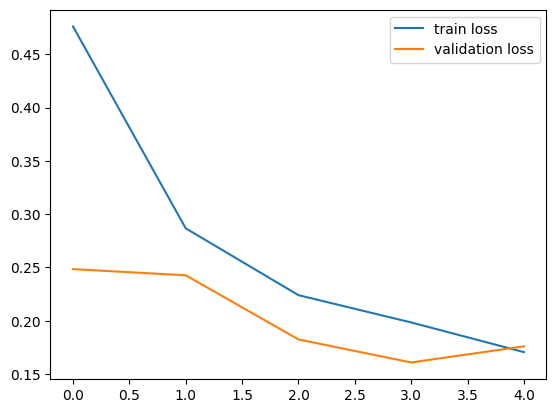

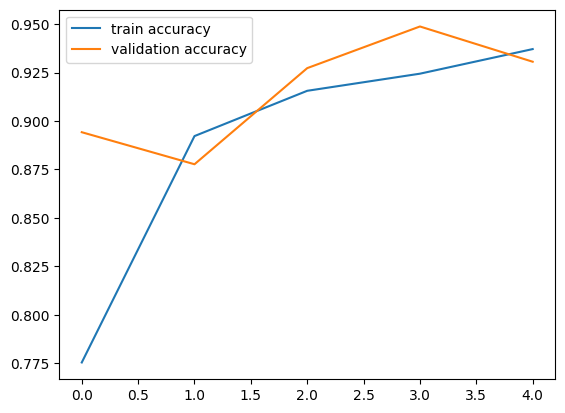

In [52]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.jpg


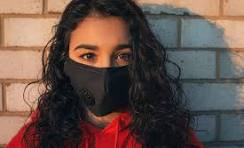

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
[[0.40438735 0.5159738 ]]
1
The person in the image is wearing a mask


In [55]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test2.jpg


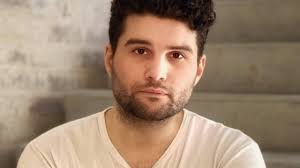

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.218187   0.62854064]]
1
The person in the image is wearing a mask


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')